We'll continue to work with the dataset, which contains data on 644 applications

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
admissions = pd.read_csv("admissions.csv")

model = LogisticRegression()
model.fit(admissions[["gpa"]], admissions["admit"])

labels = model.predict(admissions[["gpa"]])
admissions["predicted_label"] = labels

print(admissions["predicted_label"].value_counts())
print(admissions["admit"].value_counts())

0    598
1     46
Name: predicted_label, dtype: int64
0    400
1    244
Name: admit, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The admissions Dataframe now contains the predicted value for that row, in the `predicted_label` column, and the actual value for that row, in the `admit` column. This format makes it easier for us to calculate how effective the model was on the training data. The simplest way to determine the effectiveness of a classification model is prediction accuracy. Accuracy helps us answer the question:

* What fraction of the predictions were correct (actual label matched predicted label)?

Prediction accuracy boils down to the number of labels that were correctly predicted divided by the total number of observations:

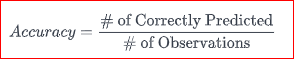

To decide who gets admitted, we set a threshold and accept all of the students where their computed probability exceeds that threshold. This threshold is called the **discrimination threshold** and scikit-learn sets it to `0.5` by default when predicting labels. 
* If the predicted probability is greater than `0.5`, the label for that observation is `1`. 
* If it is instead less than `0.5`, the label for that observation is `0`.

An accuracy of **1.0** means that the model predicted **100%** of admissions correctly for the given discrimination threshold. An accuracy of **0.2** means that the model predicted **20%** of the admissions correctly.

In [4]:
admissions["actual_label"] = admissions["admit"]

matches = admissions["predicted_label"] == admissions["actual_label"]

correct_predictions = admissions[matches]
accuracy = correct_predictions.shape[0]/admissions.shape[0]
accuracy

0.6459627329192547

Calculating the accuracy of a model on the dataset used for training is a useful initial step just to make sure the model at least beats randomly assigning a label for each observation. However, prediction accuracy doesn't tell us much more.

* The accuracy doesn't tell us how the model performs on data it wasn't trained on. A model that returns a 100% accuracy when evaluated on it's training set doesn't tell us how well the model works on data it's never seen before (and wasn't trained on). 
* Accuracy also doesn't help us discriminate between the different types of outcomes a binary classification model can make. 

In this project, we'll focus on the principles of evaluating binary classification models by testing our model's effectiveness on the training data.

To start, let's discuss the 4 different outcomes of a binary classification model:

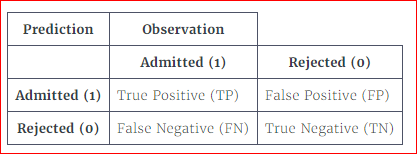

By segmenting a model's predictions into these different outcome categories, we can start to think about other measures of effectiveness that give us more granularity than simple accuracy.

In [14]:
# All of the rows where predicted_label and actual_label both equal 1
true_positives = len(admissions[(admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)])

# All of the rows where predicted_label and actual_label both equal 0
true_negatives = len(admissions[(admissions["predicted_label"] ==0) & (admissions["actual_label"] == 0)])

Let's now look at a few measures that are much more insightful than simple accuracy. Let's start with **sensitivity**:

* **Sensitivity** or **True Positive Rate** - The proportion of applicants that were correctly admitted:

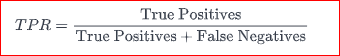

Of all of the students that should have been admitted (`True Positives` + `False Negatives`), what fraction did the model correctly admit (True Positives)? More generally, this measure helps us answer the question:

* **How effective is this model at identifying positive outcomes?**

If the **True Positive Rate** is low, it means that the model isn't effective at catching positive cases. For certain problems, high sensitivity is incredibly important. 
* If we're building a model to predict which patients have cancer, every patient that is missed by the model could mean a loss of life. We want a highly **sensitive model** that is able to **catch** all of the positive cases (in this case, the positive case is a patient with cancer).

In [16]:
# Calculate Sensitivity/True Positive Rate

false_negatives = len(admissions[(admissions["predicted_label"] ==0) & (admissions["actual_label"] == 1)])

sensitivity = true_positives/(true_positives + false_negatives)
sensitivity

0.12704918032786885

Looks like the sensitivity of the model is around `12.7%` and only about `1` in `8` students that should have been admitted were actually admitted. In the context of predicting student admissions, this probably isn't too bad of a thing. Graduate schools can only admit a select number of students into their programs and by definition they end up rejecting many qualified students that would have succeeded.

In the healthcare context, however, low sensitivity could mean a severe loss of life. If a classification model is only catching `12.7%` of positive cases for an illness, then around `7` of `8` people are going undiagnosed (being classified as false negatives).

Let's now learn about specificity:

**Specificity or True Negative Rate** - The proportion of applicants that were correctly rejected:

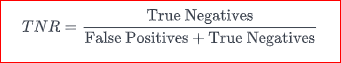


This helps us answer the question:

* **How effective is this model at identifying negative outcomes?**

In our case, the specificity tells us the proportion of applicants who should be rejected that were correctly rejected (just `True Negatives`). 
* A **high specificity** means that the model is really good at predicting which applicants should be rejected.

In [17]:
false_positives = len(admissions[(admissions["predicted_label"] == 1) & (admissions["actual_label"] == 0)])

specificity = true_negatives/ (true_negatives+false_positives)
specificity

0.9625

It looks like the specificity of the model is **96.25%**. This means that the model is really good at knowing which applicants to reject. Since around only **7%** of applicants were accepted that applied, it's important that the model reject people correctly who wouldn't have otherwise been accepted.

In this project, we learned about some of the different ways of evaluating how well a binary classification model performs.